In [2]:
import pandas as pd
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Dataset Information :\n")
df.info()

print("\nStatistics :\n")
df.describe(include='all')

print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset Information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistics :


Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

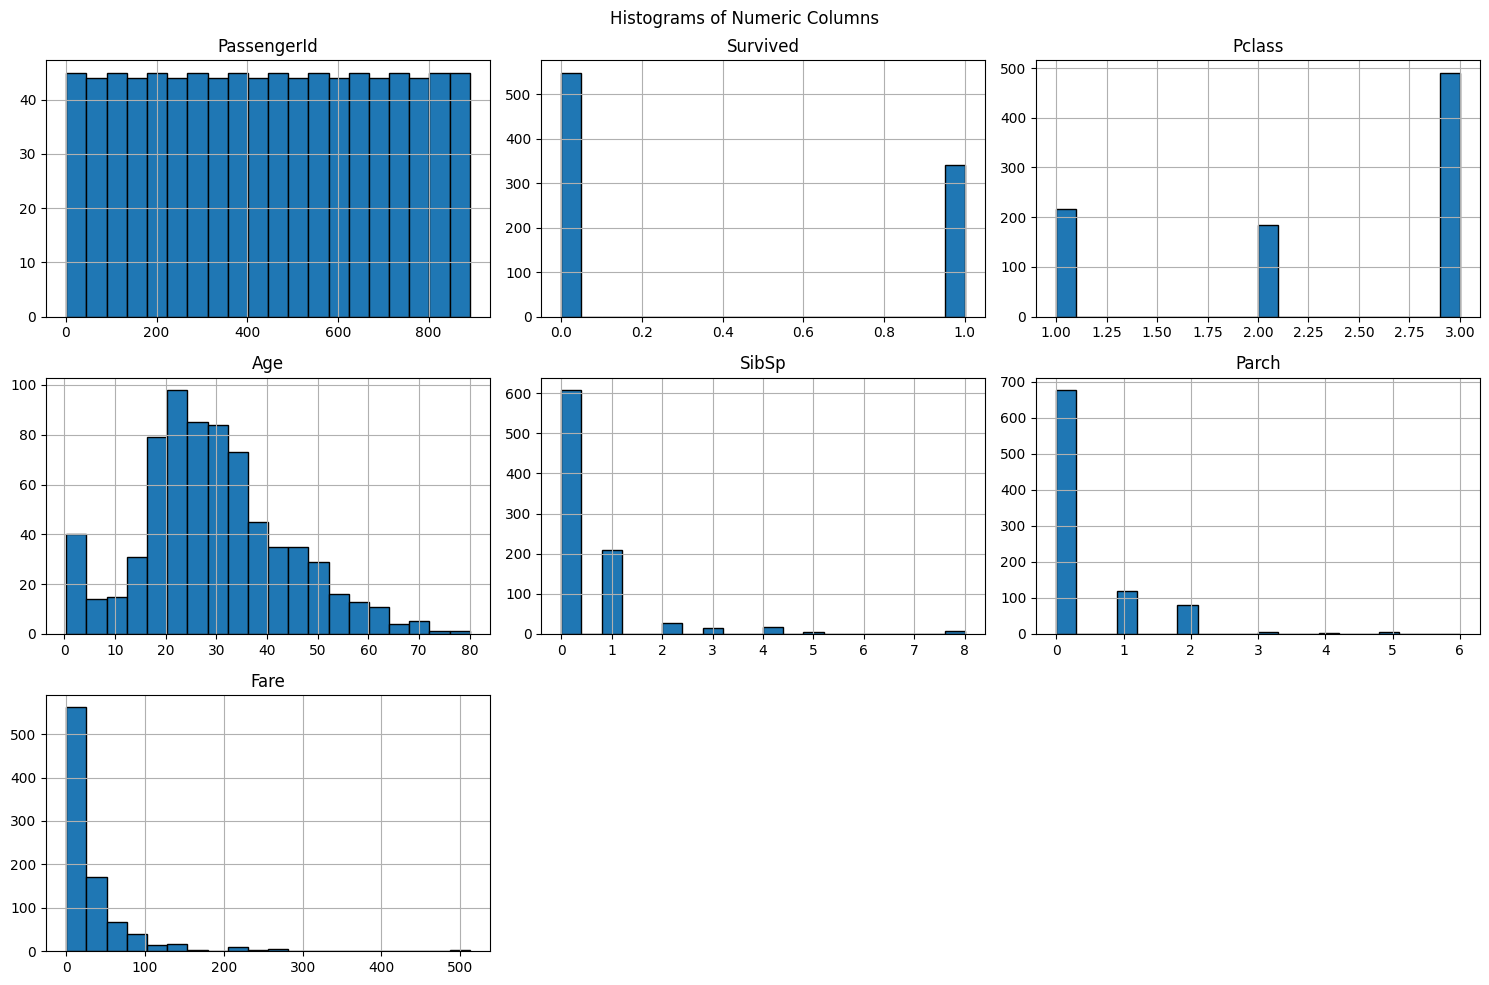

In [6]:
df[numeric_columns].hist(figsize=(15, 10),bins=20,edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()

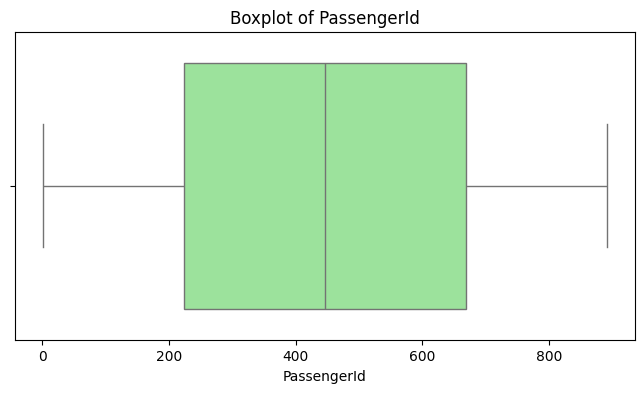

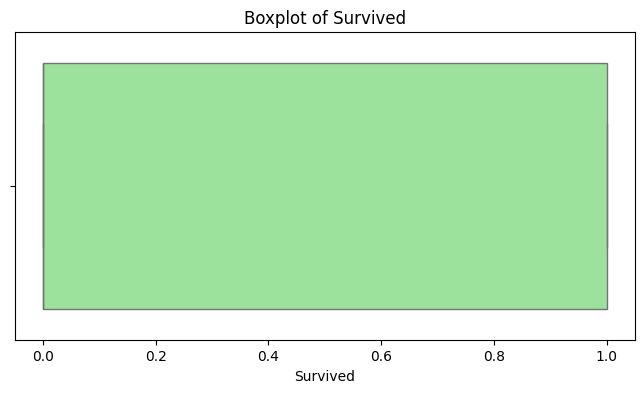

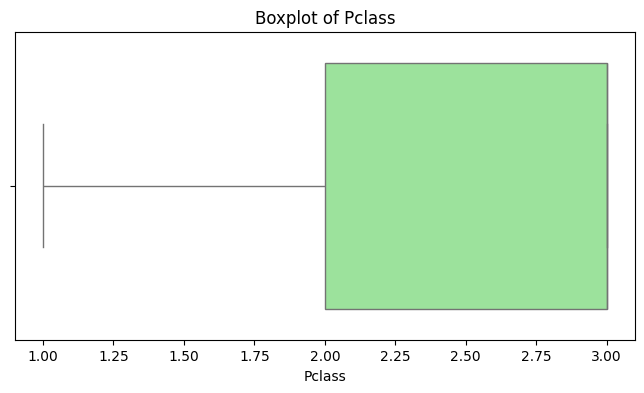

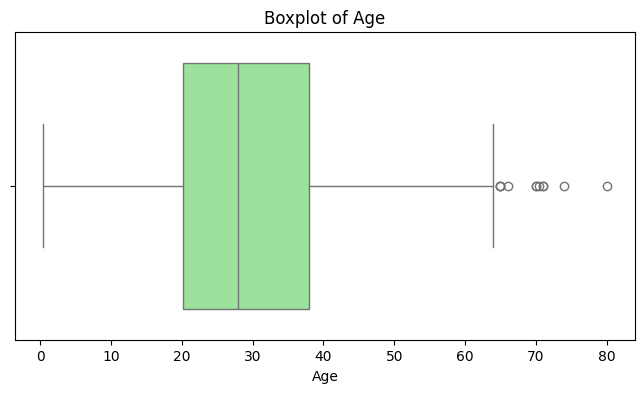

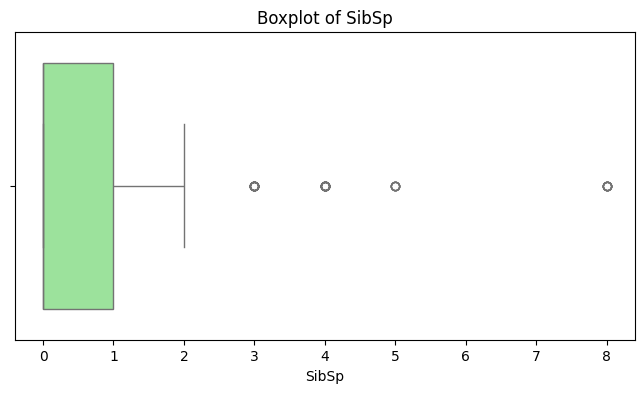

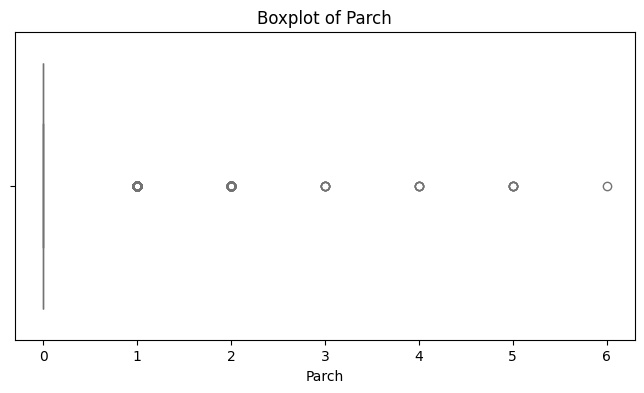

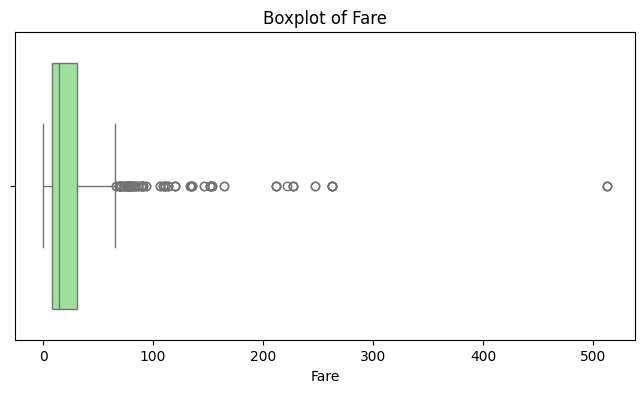

In [9]:
for i in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df,x=i,color='lightgreen')
    plt.title(f'Boxplot of {i}')
    plt.show()

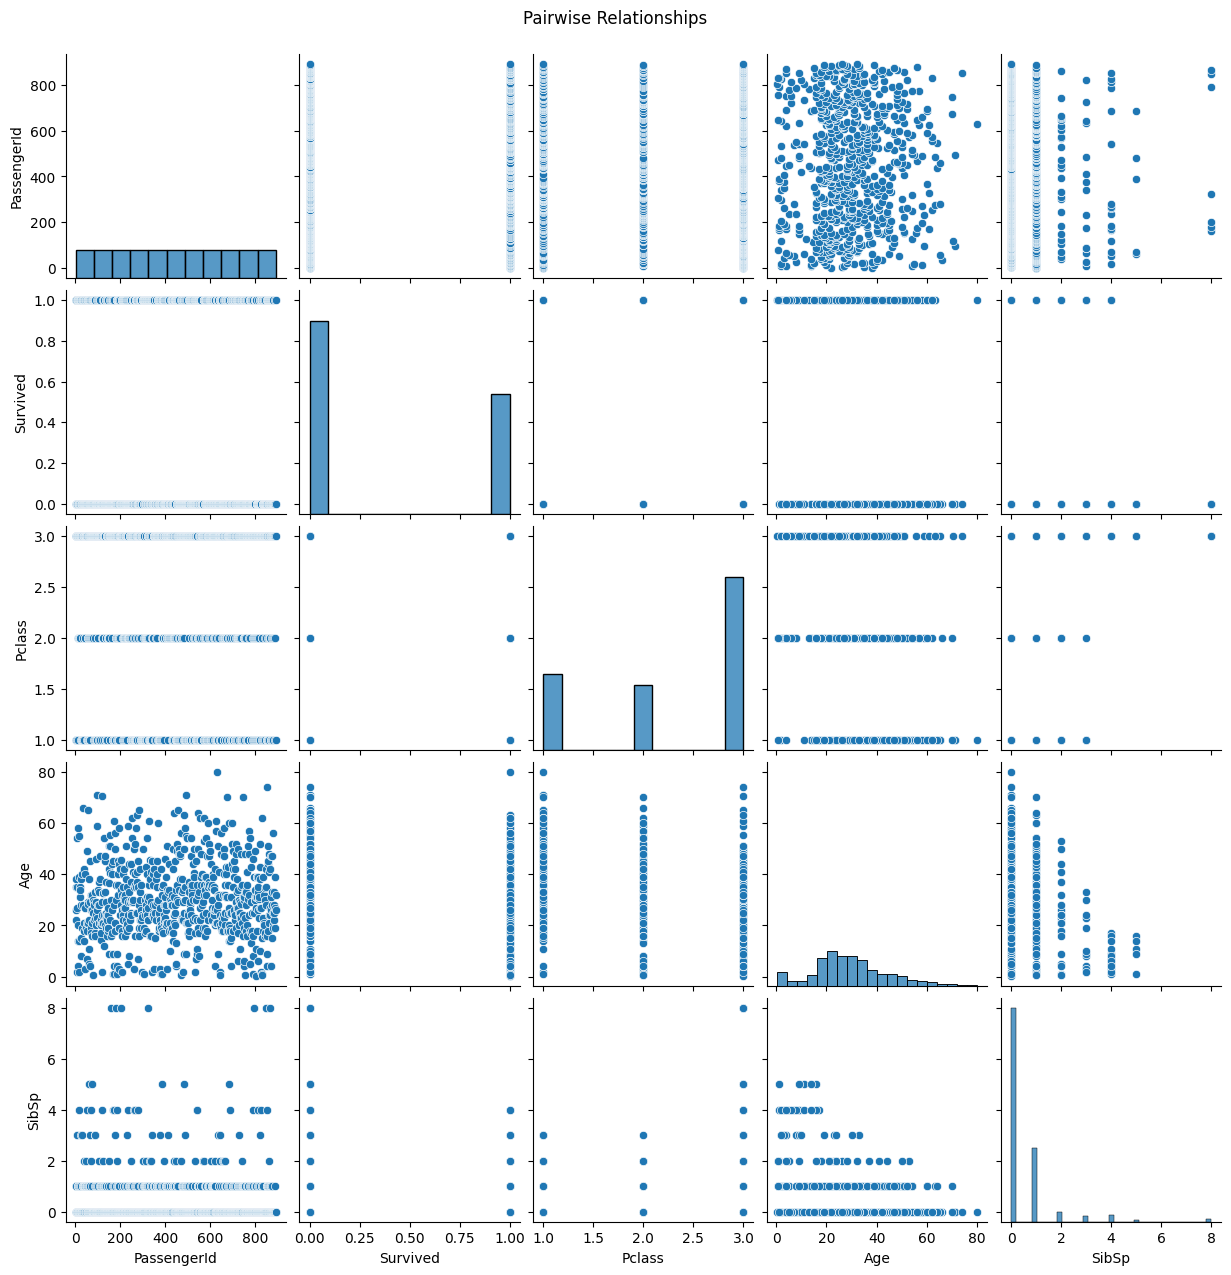

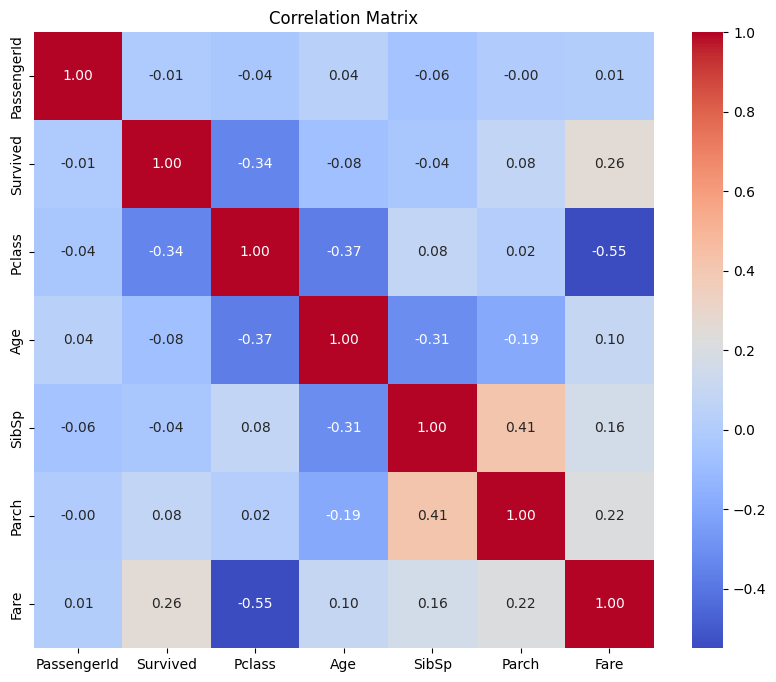

In [10]:
sns.pairplot(df[numeric_columns[:5]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [12]:
import plotly.express as px

In [13]:
for i in numeric_columns[:3]:
    fig = px.histogram(df, x=i, nbins=30, title=f'Distribution of {i}')
    fig.show()

if len(numeric_columns) <= 5:
    fig = px.scatter_matrix(df, dimensions=numeric_columns, title="Scatter Matrix")
    fig.show()

In [17]:
for i in numeric_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[i] < Q1 - 1.5 * IQR) | (df[i] > Q3 + 1.5 * IQR)]
    print(f"{i}: {len(outliers)} outliers detected")


PassengerId: 0 outliers detected
Survived: 0 outliers detected
Pclass: 0 outliers detected
Age: 11 outliers detected
SibSp: 46 outliers detected
Parch: 213 outliers detected
Fare: 116 outliers detected
